# Imports

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
import data_func.read_data as read_data
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")


# Load datasets

In [2]:
dataframes = read_data.get_training_data()
X_frames_train = dataframes[0]
Y_frames_train = dataframes[1]
X_frames_test = read_data.get_test_data()


In [3]:
XTRA = X_frames_train[0]
XTRB = X_frames_train[1]
XTRC = X_frames_train[2]

YA = Y_frames_train[0]
YB = Y_frames_train[1]
YC = Y_frames_train[2]

In [4]:
print(XTRA["date_forecast"].head())
print(YA["time"].head())

0   2019-06-02 22:00:00
1   2019-06-02 22:15:00
2   2019-06-02 22:30:00
3   2019-06-02 22:45:00
4   2019-06-02 23:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2019-06-02 22:00:00
1   2019-06-02 23:00:00
2   2019-06-03 00:00:00
3   2019-06-03 01:00:00
4   2019-06-03 02:00:00
Name: time, dtype: datetime64[ns]


To align we can drop entry 0 for both Y and X

In [5]:
print(XTRB["date_forecast"].head())
print(YB["time"].head())

0   2019-01-01 00:00:00
1   2019-01-01 00:15:00
2   2019-01-01 00:30:00
3   2019-01-01 00:45:00
4   2019-01-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2018-12-31 23:00:00
1   2019-01-01 00:00:00
2   2019-01-01 01:00:00
3   2019-01-01 02:00:00
4   2019-01-01 03:00:00
Name: time, dtype: datetime64[ns]


To align we remove 0 and 1 from Y and 0 from X

In [6]:
print(XTRC["date_forecast"].head())
print(YC["time"].head())

0   2019-01-01 00:00:00
1   2019-01-01 00:15:00
2   2019-01-01 00:30:00
3   2019-01-01 00:45:00
4   2019-01-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2018-12-31 23:00:00
1   2019-01-01 00:00:00
2   2019-01-01 01:00:00
3   2019-01-01 02:00:00
4   2019-01-01 03:00:00
Name: time, dtype: datetime64[ns]


To align we remove 0 and 1 from Y and 0 from X

In [7]:
XTRA = XTRA.drop([0]).reset_index(drop=True)
XTRB = XTRB.drop([0]).reset_index(drop=True)
XTRC = XTRC.drop([0]).reset_index(drop=True)

YA = YA.drop([0]).reset_index(drop=True)
YB = YB.drop([0, 1]).reset_index(drop=True)
YC = YC.drop([0, 1]).reset_index(drop=True)

## Cleaning Y-data

### B targets:

Start | End
--- | ---
2019-03-24 00:00:00 | 2019-03-28 00:00:00
2019-05-31 00:00:00 | 2019-06-03 14:00:00
2019-10-28 14:00:00 | 2019-10-30 23:00:00
2020-02-23 17:00:00 | 2020-03-06 06:00:00
2020-03-26 14:00:00 | 2020-03-27 22:00:00
2020-04-02 03:00:00 | 2020-04-16 08:00:00
2020-07-12 23:00:00 | 2020-08-25 23:00:00
2020-09-24 14:00:00 | 2020-09-25 23:00:00
2021-01-15 10:00:00 | 2021-04-19 09:00:00
2021-04-29 00:00:00 | 2021-05-01 23:00:00
2021-06-05 03:00:00 | 2021-06-07 08:00:00
2021-06-13 04:00:00 | 2021-06-14 10:00:00
2021-06-22 03:00:00 | 2021-06-24 08:00:00
2021-07-03 15:00:00 | 2021-07-06 07:00:00
2021-08-26 00:00:00 | 2021-09-03 22:00:00
2021-09-08 15:00:00 | 2021-09-14 13:00:00
2021-09-19 02:00:00 | 2021-09-27 10:00:00
2021-01-30 15:00:00 | 2022-02-04 09:00:00
2022-02-10 21:00:00 | 2022-02-13 07:00:00
2022-02-16 14:00:00 | 2022-02-24 06:00:00
2022-03-19 15:00:00 | 2022-04-13 06:00:00
2022-12-05 17:00:00 | 2023-01-05 08:00:00
2023-02-24 01:00:00 | 2023-02-27 05:00:00
2023-03-07 10:00:00 | 2023-03-10 01:00:00
2023-03-25 23:00:00 | 2023-03-28 02:00:00

### C-targets:

Start | End
---|---
2020-02-23 17:00:00 | 2020-03-08 08:00:00

In [8]:
start_times_b = [
    '2019-03-24 00:00:00',
'2019-05-31 00:00:00',
'2019-10-28 14:00:00',
'2020-02-23 17:00:00',
'2020-03-26 14:00:00',
'2020-04-02 03:00:00',
'2020-07-12 23:00:00',
'2020-09-24 14:00:00',
'2021-01-15 10:00:00',
'2021-04-29 00:00:00',
'2021-06-05 03:00:00',
'2021-06-13 04:00:00',
'2021-06-22 03:00:00',
'2021-07-03 15:00:00',
'2021-08-26 00:00:00',
'2021-09-08 15:00:00',
'2021-09-19 02:00:00',
'2021-01-30 15:00:00',
'2022-02-10 21:00:00',
'2022-02-16 14:00:00',
'2022-03-19 15:00:00',
'2022-12-05 17:00:00',
'2023-02-24 01:00:00',
'2023-03-07 10:00:00',
'2023-03-25 23:00:00'
]

end_times_b = [
    '2019-03-28 00:00:00',
'2019-06-03 14:00:00',
'2019-10-30 23:00:00',
'2020-03-06 06:00:00',
'2020-03-27 22:00:00',
'2020-04-16 08:00:00',
'2020-08-25 23:00:00',
'2020-09-25 23:00:00',
'2021-04-19 09:00:00',
'2021-05-01 23:00:00',
'2021-06-07 08:00:00',
'2021-06-14 10:00:00',
'2021-06-24 08:00:00',
'2021-07-06 07:00:00',
'2021-09-03 22:00:00',
'2021-09-14 13:00:00',
'2021-09-27 10:00:00',
'2022-02-04 09:00:00',
'2022-02-13 07:00:00',
'2022-02-24 06:00:00',
'2022-04-13 06:00:00',
'2023-01-05 08:00:00',
'2023-02-27 05:00:00',
'2023-03-10 01:00:00',
'2023-03-28 02:00:00'
]

print("before B drop: ", len(YB))

for i in range(len(start_times_b)):
    a = pd.to_datetime(start_times_b[i])
    b = pd.to_datetime(end_times_b[i])
    ind = YB[ (YB['time'] >= a) & (YB['time'] <= b)].index
    
    YB.drop(ind, inplace=True)

print("after B drop: ", len(YB))

print("before C drop: ", len(YC))

a = pd.to_datetime("2020-02-23 17:00:00")
b = pd.to_datetime('2020-03-08 08:00:00')
ind = YC[ (YC['time'] >= a) & (YC['time'] <= b)].index
    
YC.drop(ind, inplace=True)
print("after C drop: ", len(YC))

before B drop:  32846
after B drop:  20626
before C drop:  32153
after C drop:  31825


Need to reset index for aggregation function

In [9]:
import data_func.aggregation as data_agg


In [10]:
for x in X_frames_test:
    print(x["date_forecast"].head())

0   2023-05-01 00:00:00
1   2023-05-01 00:15:00
2   2023-05-01 00:30:00
3   2023-05-01 00:45:00
4   2023-05-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2023-05-01 00:00:00
1   2023-05-01 00:15:00
2   2023-05-01 00:30:00
3   2023-05-01 00:45:00
4   2023-05-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2023-05-01 00:00:00
1   2023-05-01 00:15:00
2   2023-05-01 00:30:00
3   2023-05-01 00:45:00
4   2023-05-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]


drop 0 since we want to match on the "whole" hour.

In [11]:
for i in range(len(X_frames_test)):
    X_frames_test[i] = X_frames_test[i].drop([0]).reset_index(drop=True)

# Data Aggregation

In [12]:
# making shure that target values line up with x_values
import data_func.aggregation as data_agg

categorical_col = ['dew_or_rime:idx', 'precip_type_5min:idx', 'is_day:idx', 'is_in_shadow:idx']

def aggregate_correct_x(x: pd.DataFrame) -> pd.DataFrame:
   '''
   Takes a given dataframe and returns an aggregated dataframe based on selected categorical functions. 
   Assumes grouping of 4.
   '''
   categorical = x[["date_forecast"] + categorical_col]
   mean = x.drop(columns=categorical_col)

   categorical = data_agg.gen_agg(categorical, agg_type=data_agg.stocastic_median, merge_on = 'last')
   mean = data_agg.gen_agg(mean, "mean", merge_on = 'last')

   return pd.merge(categorical, mean, on="date_forecast")

def data_allign(x_train, y_train):

  y_train.dropna(inplace=True)
  x_train = aggregate_correct_x(x_train)
  combined_data = pd.merge(x_train, y_train, left_on='date_forecast', right_on='time')
  y_train = combined_data['pv_measurement']

  if 'time' and 'pv_measurement' in combined_data.columns:
    combined_data.drop(columns=['time', 'pv_measurement'], inplace=True)
    
  return combined_data, y_train



X_train = [XTRA, XTRB, XTRC]
Y_train = [YA, YB, YC]

for i in range(len(X_train)):
    X_train[i], Y_train[i] = data_allign(X_train[i], Y_train[i])

for j in range(len(X_frames_test)):
    X_frames_test[j] = aggregate_correct_x(X_frames_test[j])




In [13]:
#Verify length matches
for x in range(len(X_train)):
    print("x,y: ", len(X_train[x]), len(Y_train[x]))



x,y:  34059 34059
x,y:  20598 20598
x,y:  25742 25742


# Feature engineering

In [14]:
import data_func.timeseasonality as DTS
import data_func.one_hot_encoding as OHE
for i in range(len(X_train)):
    X_train[i] = DTS.append_seasonal_columns(X_train[i])
    

for i in range(len(X_frames_test)):
    X_frames_test[i] = DTS.append_seasonal_columns(X_frames_test[i])
    

# THIS SECTION CAN ONLY WORK IF THE PREVIOUS AGGREGATION IS DONE INDIVIDUALLY FOR CATEGORICAL DATA
# import data_func.one_hot_encoding as OHE

def fix_categorical(train: pd.DataFrame, test: pd.DataFrame):
     temp = train.append(test, ignore_index = True)
     index_train = temp[(temp['date_forecast'] < test['date_forecast'].iloc[0])].index
     return temp.drop(index_train)

OH_columns = ['dew_or_rime:idx', 'precip_type_5min:idx']

for i in range(len(X_frames_test)):
     X_train[i] = OHE.one_hot_encode(X_train[i],OH_columns)
     X_frames_test[i] = OHE.one_hot_encode(X_frames_test[i], OH_columns)

     X_frames_test[i] = fix_categorical(X_train[i], X_frames_test[i])
     X_train[i].drop(columns=['date_forecast'], inplace=True)
     X_frames_test[i].drop(columns=['date_forecast'], inplace=True)


/var/folders/94/wm45lcfj7sv746_0rnyvdk840000gn/T/ipykernel_46724/1583762016.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = train.append(test, ignore_index = True)
/var/folders/94/wm45lcfj7sv746_0rnyvdk840000gn/T/ipykernel_46724/1583762016.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = train.append(test, ignore_index = True)
/var/folders/94/wm45lcfj7sv746_0rnyvdk840000gn/T/ipykernel_46724/1583762016.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = train.append(test, ignore_index = True)


## Data Cleaning

In [15]:
# Show null values for all training sets

count_a = X_train[0].isna().sum()
count_b = X_train[1].isna().sum()
count_c = X_train[2].isna().sum()

count_a.rename("A", inplace=True)
count_b.rename("B", inplace=True)
count_c.rename("C", inplace=True)

df = pd.merge(count_a, count_b, left_index=True, right_index=True)
df = pd.merge(df, count_c, left_index=True, right_index=True)

df[(df['A'] != 0) | (df['B'] != 0) | (df['C'] != 0)]

,A,B,C
ceiling_height_agl:m,6115,2970,5124
cloud_base_agl:m,2354,1582,2195
snow_density:kgm3,32914,19612,24280


In [16]:
# Show null values for all test sets

count_a = X_frames_test[0].isna().sum()
count_b = X_frames_test[1].isna().sum()
count_c = X_frames_test[2].isna().sum()

count_a.rename("A", inplace=True)
count_b.rename("B", inplace=True)
count_c.rename("C", inplace=True)

df = pd.merge(count_a, count_b, left_index=True, right_index=True)
df = pd.merge(df, count_c, left_index=True, right_index=True)

df[(df['A'] != 0) | (df['B'] != 0) | (df['C'] != 0)]

,A,B,C
ceiling_height_agl:m,181,173,196
cloud_base_agl:m,66,61,84
snow_density:kgm3,720,720,720
dew_or_rime:idx_-1,720,720,0
precip_type_5min:idx_2,720,720,0
precip_type_5min:idx_3,720,720,720


In [17]:
# Removes nan or fills it
values = {"ceiling_height_agl:m": 20000, "cloud_base_agl:m": 20000}

for i in range(len(X_train)):
    X_train[i].drop(columns=['snow_density:kgm3', 'elevation:m'], inplace=True)
    X_frames_test[i].drop(columns=['snow_density:kgm3', 'elevation:m'], inplace=True)
    X_train[i].fillna(value=values, inplace=True)
    X_frames_test[i].fillna(value=values, inplace=True)
    X_frames_test[i].fillna(0, inplace=True) # fills remaining NaN vals with 0

## Removing snow from A

Suspect snow is not very relevant for A-set

In [18]:
X_train[0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_day:idx,34059.0,0.489621,0.499900,0.000000,0.000000,0.000000e+00,1.000000,1.000000e+00
is_in_shadow:idx,34059.0,0.522446,0.499503,0.000000,0.000000,1.000000e+00,1.000000,1.000000e+00
absolute_humidity_2m:gm3,34059.0,6.322364,2.799469,0.700000,4.200000,5.825000e+00,8.250000,1.740000e+01
air_density_2m:kgm3,34059.0,1.253278,0.037206,1.145000,1.227500,1.251500e+00,1.277250,1.426000e+00
ceiling_height_agl:m,34059.0,6026.395996,6935.236328,27.875000,1287.625000,2.647050e+03,7526.862549,2.000000e+04
clear_sky_energy_1h:J,34059.0,552703.625000,848353.312500,0.000000,0.000000,1.964755e+04,902072.968750,2.998650e+06
clear_sky_rad:W,34059.0,153.528702,236.248672,0.000000,0.000000,4.300000e+00,249.774994,8.338000e+02
cloud_base_agl:m,34059.0,2990.248047,4950.354004,27.799999,615.475006,1.250250e+03,2491.500000,2.000000e+04
dew_point_2m:K,34059.0,275.971863,6.892369,251.000000,271.299988,2.760000e+02,281.349976,2.937000e+02
diffuse_rad:W,34059.0,42.072437,62.838772,0.000000,0.000000,2.200000e+00,70.750000,3.355500e+02


In [19]:
snow_columns = ["fresh_snow_12h:cm", 
                "fresh_snow_1h:cm",
                "fresh_snow_24h:cm",
                "fresh_snow_3h:cm",
                "fresh_snow_6h:cm",
                "snow_drift:idx",
                "snow_depth:cm",
                "snow_melt_10min:mm",
                "snow_water:kgm2"]

X_train[0].drop(columns=snow_columns, inplace=True)
X_frames_test[0].drop(columns=snow_columns, inplace=True)

X_frames_test[0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_day:idx,720.0,7.875000e-01,4.093611e-01,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
is_in_shadow:idx,720.0,2.083333e-01,4.063988e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
absolute_humidity_2m:gm3,720.0,8.207511e+00,2.174437e+00,3.200000,6.700000,8.075001e+00,1.000000e+01,1.360000e+01
air_density_2m:kgm3,720.0,1.233123e+00,3.207187e-02,1.151000,1.209000,1.238250e+00,1.260000e+00,1.300000e+00
ceiling_height_agl:m,720.0,7.344279e+03,7.765924e+03,53.299999,1221.425018,3.153225e+03,2.000000e+04,2.000000e+04
clear_sky_energy_1h:J,720.0,1.227651e+06,1.101479e+06,0.000000,63704.814453,1.030980e+06,2.348519e+06,2.998053e+06
clear_sky_rad:W,720.0,3.410140e+02,3.069118e+02,0.000000,16.337499,2.793625e+02,6.492313e+02,8.334250e+02
cloud_base_agl:m,720.0,3.534442e+03,5.594899e+03,30.250000,549.300003,1.219375e+03,3.112012e+03,2.000000e+04
dew_point_2m:K,720.0,2.808040e+02,4.330719e+00,268.100006,278.024994,2.810625e+02,2.843500e+02,2.894500e+02
diffuse_rad:W,720.0,8.490232e+01,7.859216e+01,0.000000,8.500000,7.442500e+01,1.339812e+02,3.140500e+02


# Training the model

In [20]:
import tensorflow as tf

normalizer_A = tf.keras.layers.Normalization(axis=-1)
normalizer_A.adapt(X_train[0])

first = np.array(X_train[0][:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer_A(first).numpy())

normalizer_B = tf.keras.layers.Normalization(axis=-1)
normalizer_B.adapt(X_train[1])
normalizer_C = tf.keras.layers.Normalization(axis=-1)
normalizer_C.adapt(X_train[2])

First example: [[    0.       1.       7.7      1.23  1718.62     0.       0.    1718.62
    280.3      0.       0.       0.       0.      99.3   1005.97     0.
    993.45   999.45     0.       0.      70.7   1005.47   351.51    -4.07
      0.     286.45   100.   40901.43     3.55    -3.55    -0.3      0.
     -0.26     0.97     0.49    -0.87     0.       1.       0.       1.
      0.       0.       0.  ]]

Normalized: [[-0.98  0.96  0.49 -0.71 -0.62 -0.65 -0.65 -0.26  0.63 -0.67 -0.68 -0.46
  -0.46  0.93 -0.28 -0.2  -0.26 -0.27 -0.08 -0.25 -0.24 -0.28  1.72 -0.17
  -0.54  0.98  0.77  0.47  0.28 -1.46 -0.47 -0.01 -0.37  1.37  0.71 -1.25
  -0.09  0.19 -0.17  0.24 -0.22 -0.07 -0.08]]


In [21]:
def build_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(64, activation="relu", input_shape=[len(X_train[0].keys())]),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    optim = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optim, metrics=["mae", "mse"])

    return model

In [31]:
model_a = build_model(normalizer_A)
model_b = build_model(normalizer_B)
model_c = build_model(normalizer_C)

## -->EVALUATE<--

In [24]:
x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(X_train[0], Y_train[0], test_size=0.17, random_state=None)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(X_train[1], Y_train[1], test_size=0.17, random_state=None)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(X_train[2], Y_train[2], test_size=0.17, random_state=None)

In [25]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_a = model_a.fit(
    x_train_a,
    y_train_a,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_b = model_b.fit(
    x_train_b,
    y_train_b,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_c = model_c.fit(
    x_train_c,
    y_train_c,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

Epoch 1/1000
707/707 [==============================] - 1s 737us/step - loss: 727725.1875 - mae: 398.7513 - mse: 727725.1875 - val_loss: 287912.2500 - val_mae: 281.3722 - val_mse: 287912.2500
Epoch 2/1000
707/707 [==============================] - 0s 654us/step - loss: 254763.0781 - mae: 260.0045 - mse: 254763.0781 - val_loss: 248990.7812 - val_mae: 252.9430 - val_mse: 248990.7812
Epoch 3/1000
707/707 [==============================] - 0s 585us/step - loss: 241124.0781 - mae: 248.8369 - mse: 241124.0781 - val_loss: 243757.0000 - val_mae: 248.4681 - val_mse: 243757.0000
Epoch 4/1000
707/707 [==============================] - 0s 571us/step - loss: 237184.2344 - mae: 245.3075 - mse: 237184.2344 - val_loss: 236818.0938 - val_mae: 243.6134 - val_mse: 236818.0938
Epoch 5/1000
707/707 [==============================] - 0s 595us/step - loss: 233336.1094 - mae: 241.8971 - mse: 233336.1094 - val_loss: 232207.2344 - val_mae: 240.7757 - val_mse: 232207.2344
Epoch 6/1000
707/707 [==================

In [29]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 1000000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

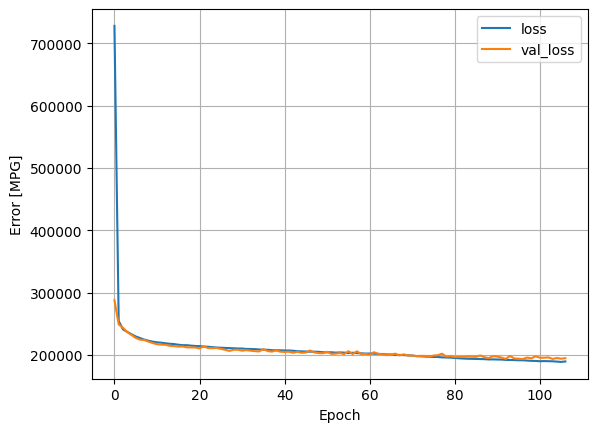

In [30]:
plot_loss(history_a)


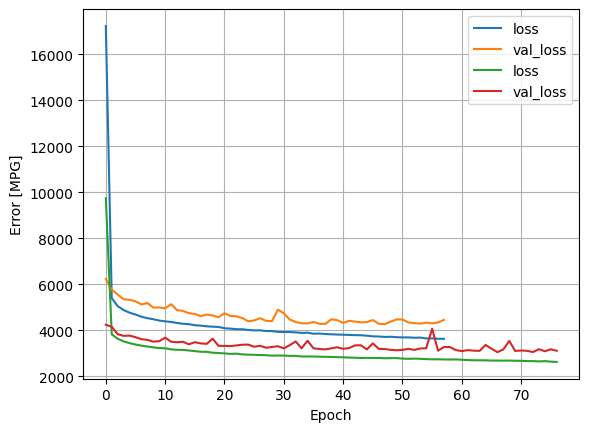

In [31]:
plot_loss(history_b)
plot_loss(history_c)

In [32]:
print(model_a.evaluate(x_val_a, y_val_a))
print(model_b.evaluate(x_val_b, y_val_b))
print(model_c.evaluate(x_val_c, y_val_c))

181/181 [==============================] - 0s 438us/step - loss: 189830.1406 - mae: 207.1566 - mse: 189830.1406
[189830.140625, 207.15655517578125, 189830.140625]
110/110 [==============================] - 0s 436us/step - loss: 4008.0125 - mae: 26.7103 - mse: 4008.0125
[4008.012451171875, 26.710268020629883, 4008.012451171875]
137/137 [==============================] - 0s 419us/step - loss: 2637.3911 - mae: 24.5427 - mse: 2637.3911
[2637.39111328125, 24.542695999145508, 2637.39111328125]


## --> ProperPrediction <--

In [32]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_a = model_a.fit(
    X_train[0],
    Y_train[0],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_b = model_b.fit(
    X_train[1],
    Y_train[1],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_c = model_c.fit(
    X_train[2],
    Y_train[2],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

Epoch 1/1000
852/852 [==============================] - 1s 670us/step - loss: 658688.0625 - mae: 383.8672 - mse: 658688.0625 - val_loss: 218755.8125 - val_mae: 238.8866 - val_mse: 218755.8125
Epoch 2/1000
852/852 [==============================] - 1s 627us/step - loss: 258438.6250 - mae: 262.0532 - mse: 258438.6250 - val_loss: 197238.4844 - val_mae: 220.3533 - val_mse: 197238.4844
Epoch 3/1000
852/852 [==============================] - 0s 576us/step - loss: 251171.5469 - mae: 254.2119 - mse: 251171.5469 - val_loss: 197419.2188 - val_mae: 215.5312 - val_mse: 197419.2188
Epoch 4/1000
852/852 [==============================] - 0s 568us/step - loss: 248291.2656 - mae: 250.9895 - mse: 248291.2656 - val_loss: 183756.2188 - val_mae: 211.3626 - val_mse: 183756.2188
Epoch 5/1000
852/852 [==============================] - 0s 548us/step - loss: 246484.2969 - mae: 249.4090 - mse: 246484.2969 - val_loss: 180796.8281 - val_mae: 209.9923 - val_mse: 180796.8281
Epoch 6/1000
852/852 [==================

# Make predictions

In [24]:
X_frames_test[0].describe()

,is_day:idx,is_in_shadow:idx,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_point_2m:K,diffuse_rad:W,...,cosinus_day,sinus_year,cosinus_year,dew_or_rime:idx_-1,dew_or_rime:idx_0,dew_or_rime:idx_1,precip_type_5min:idx_0,precip_type_5min:idx_1,precip_type_5min:idx_2,precip_type_5min:idx_3
count,720.000000,720.000000,720.000000,720.000000,539.000000,7.200000e+02,720.000000,654.000000,720.000000,720.000000,...,7.200000e+02,720.000000,720.000000,0.0,720.000000,720.000000,720.000000,720.000000,0.0,0.0
mean,0.787500,0.208333,8.207511,1.233123,3094.399658,1.227651e+06,341.014038,1872.780640,280.803986,84.902321,...,-2.973718e-06,0.421196,-0.860567,NaN,0.968056,0.031944,0.936111,0.063889,NaN,NaN
std,0.409361,0.406399,2.174437,0.032072,2935.860107,1.101479e+06,306.911774,2073.476074,4.330719,78.592163,...,7.075941e-01,0.254199,0.132341,NaN,0.175974,0.175974,0.244725,0.244725,NaN,NaN
min,0.000000,0.000000,3.200000,1.151000,53.299999,0.000000e+00,0.000000,30.250000,268.100006,0.000000,...,-1.000000e+00,-0.026074,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,0.000000,6.700000,1.209000,973.349976,6.370481e+04,16.337499,513.025024,278.024994,8.500000,...,-7.071068e-01,0.221162,-0.975237,NaN,1.000000,0.000000,1.000000,0.000000,NaN,NaN
50%,1.000000,0.000000,8.075001,1.238250,1682.825073,1.030980e+06,279.362503,1059.324951,281.062500,74.424999,...,-3.944755e-13,0.470157,-0.882582,NaN,1.000000,0.000000,1.000000,0.000000,NaN,NaN
75%,1.000000,0.000000,10.000000,1.260000,4138.387695,2.348519e+06,649.231293,2423.093750,284.350006,133.981247,...,7.071068e-01,0.634315,-0.773075,NaN,1.000000,0.000000,1.000000,0.000000,NaN,NaN
max,1.000000,1.000000,13.600000,1.300000,11417.599609,2.998053e+06,833.424988,11256.700195,289.450012,314.049988,...,1.000000e+00,0.879116,-0.476607,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN


In [25]:
X_train[0].describe()

,is_day:idx,is_in_shadow:idx,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_point_2m:K,diffuse_rad:W,...,cosinus_day,sinus_year,cosinus_year,dew_or_rime:idx_-1,dew_or_rime:idx_0,dew_or_rime:idx_1,precip_type_5min:idx_0,precip_type_5min:idx_1,precip_type_5min:idx_2,precip_type_5min:idx_3
count,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,3.405900e+04,34059.000000,34059.000000,34059.000000,34059.000000,...,3.405900e+04,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000
mean,0.489621,0.522446,6.322364,1.253278,6026.395996,5.527036e+05,153.528702,2990.248047,275.971863,42.072437,...,8.608155e-05,-0.011466,0.013260,0.008338,0.964415,0.027247,0.944156,0.044951,0.004551,0.006342
std,0.499900,0.499503,2.799469,0.037206,6935.236328,8.483533e+05,236.248672,4950.354004,6.892369,62.838772,...,7.071455e-01,0.705720,0.708295,0.090935,0.185257,0.162804,0.229624,0.207200,0.067308,0.079385
min,0.000000,0.000000,0.700000,1.145000,27.875000,0.000000e+00,0.000000,27.799999,251.000000,0.000000,...,-1.000000e+00,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.200000,1.227500,1287.625000,0.000000e+00,0.000000,615.475006,271.299988,0.000000,...,-7.071068e-01,-0.710965,-0.697272,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,5.825000,1.251500,2647.050049,1.964755e+04,4.300000,1250.250000,276.000000,2.200000,...,-1.452937e-14,-0.027951,0.025798,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,8.250000,1.277250,7526.862549,9.020730e+05,249.774994,2491.500000,281.349976,70.750000,...,7.071068e-01,0.695916,0.721313,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,17.400000,1.426000,20000.000000,2.998650e+06,833.799988,20000.000000,293.700012,335.549988,...,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:

y_a = model_a.predict(X_frames_test[0])
y_b = model_b.predict(X_frames_test[1])
y_c = model_c.predict(X_frames_test[2])

23/23 [==============================] - 0s 458us/step


In [34]:
y_pred = np.concatenate((y_a, y_b, y_c), axis=0)
for i in range(len(y_pred)):
    if y_pred[i] < 0: 
        y_pred[i] = 0

# Create submission

In [35]:
y_test_pred = y_pred

test = pd.read_csv('../data/test.csv')
test['prediction'] = y_test_pred
sample_submission = pd.read_csv('../data/sample_submission.csv')
submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
submission.to_csv('submission_tf_nosnow.csv', index=False)